<a href="https://colab.research.google.com/github/Ashish-2070/Prodective-Modeling-and-Statistics/blob/master/Simple_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving housepricedata.csv to housepricedata.csv


In [3]:
import io
data = pd.read_csv(io.StringIO(uploaded['housepricedata.csv'].decode('utf-8')))

In [4]:
data.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [5]:
data.tail()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0
1459,9937,5,6,1256,1,1,3,6,0,276,0


In [6]:
data.shape

(1460, 11)

In [7]:
data.describe()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10516.828082,6.099315,5.575342,1057.429452,1.565068,0.382877,2.866438,6.517808,0.613014,472.980137,0.498630
std,9981.264932,1.382997,1.112799,438.705324,0.550916,0.502885,0.815778,1.625393,0.644666,213.804841,0.500169
min,1300.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,7553.500000,5.000000,5.000000,795.750000,1.000000,0.000000,2.000000,5.000000,0.000000,334.500000,0.000000
50%,9478.500000,6.000000,5.000000,991.500000,2.000000,0.000000,3.000000,6.000000,1.000000,480.000000,0.000000
75%,11601.500000,7.000000,6.000000,1298.250000,2.000000,1.000000,3.000000,7.000000,1.000000,576.000000,1.000000
max,215245.000000,10.000000,9.000000,6110.000000,3.000000,2.000000,8.000000,14.000000,3.000000,1418.000000,1.000000


In [8]:
data.isnull().sum()

LotArea             0
OverallQual         0
OverallCond         0
TotalBsmtSF         0
FullBath            0
HalfBath            0
BedroomAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageArea          0
AboveMedianPrice    0
dtype: int64

In [9]:
## There is no Missing Values in the data set

In [10]:
### In last column, we have the feature that we would like to predict which is the house price above the median or not? (1 for yes and 0 for no)

In [11]:
## We now split our dataset into input features (X) and the feature we wish to predict (Y). To do that split, we simply assign the first 10 columns of our array to a variable called X and the last column of our array to a variable called Y.

In [15]:
dataset = data.values

In [16]:
X = dataset[:,0:10]
Y = dataset[:,10]


In [21]:
from sklearn import preprocessing

In [35]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [22]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [37]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [38]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [26]:
## Building the Model

In [39]:
from keras.models import Sequential
from keras.layers import Dense

In [29]:
## We will be using the Sequential model, which means that we merely need to describe the layers above in sequence. Our neural network has three layers:

#Hidden layer 1: 30 neurons, ReLU activation
#Hidden layer 2: 30 neurons, ReLU activation
#Output Layer: 1 neuron, Sigmoid activation

In [40]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [31]:
## Now that we've got our architecture specified, we need to find the best numbers for it. Before we start our training, we have to configure the model by

#Telling it what algorithm you want to use to do the optimization (we'll use stochastic gradient descent)
#Telling it what loss function to use (for binary classification, we will use binary cross entropy)
#Telling it what other metrics you want to track apart from the loss function (we want to track accuracy as well)

In [41]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [42]:
history = model.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 0s 108us/step - loss: 0.6891 - accuracy: 0.5127 - val_loss: 0.6881 - val_accuracy: 0.4840
Epoch 2/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6850 - accuracy: 0.5254 - val_loss: 0.6836 - val_accuracy: 0.4932
Epoch 3/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6807 - accuracy: 0.5323 - val_loss: 0.6789 - val_accuracy: 0.5068
Epoch 4/100
1022/1022 [==============================] - 0s 39us/step - loss: 0.6759 - accuracy: 0.5431 - val_loss: 0.6732 - val_accuracy: 0.5342
Epoch 5/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6700 - accuracy: 0.6575 - val_loss: 0.6655 - val_accuracy: 0.6484
Epoch 6/100
1022/1022 [==============================] - 0s 40us/step - loss: 0.6636 - accuracy: 0.7280 - val_loss: 0.6585 - val_accuracy: 0.7489
Epoch 7/100
1022/1022 [==============================] - 0s 39us/step - loss

In [43]:
model.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 37us/step


0.8904109597206116

In [44]:
## Visualizing Loss and Accuracy

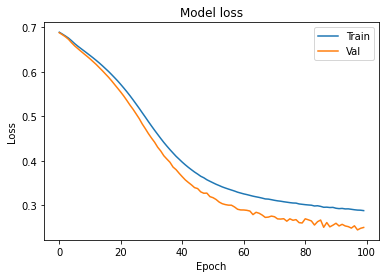

In [46]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

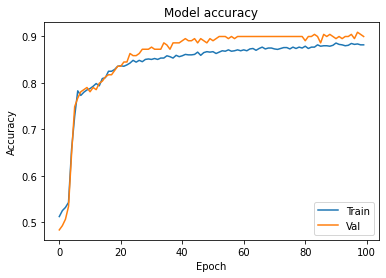

In [49]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [50]:
## Adding Regularization to our Neural Network

In [51]:
model_2 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_2.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_2 = model_2.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.8082 - val_loss: 0.3133 - val_accuracy: 0.8630
Epoch 2/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.3525 - accuracy: 0.8474 - val_loss: 0.3299 - val_accuracy: 0.8539
Epoch 3/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.3149 - accuracy: 0.8718 - val_loss: 0.2405 - val_accuracy: 0.9087
Epoch 4/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.2811 - accuracy: 0.8816 - val_loss: 0.1874 - val_accuracy: 0.9224
Epoch 5/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.3081 - accuracy: 0.8708 - val_loss: 0.3266 - val_accuracy: 0.8493
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.2839 - accuracy: 0.8875 - val_loss: 0.2258 - val_accuracy: 0.9087
Epoch 7/100
1022/1022 [==============================] - 2s 1ms/step - loss: 0.2741

In [52]:
model_2.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 277us/step


0.8767123222351074

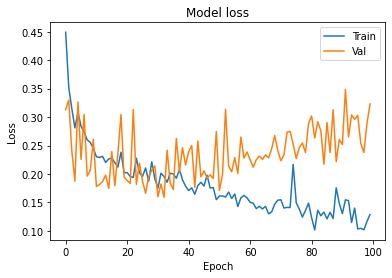

In [53]:
plt.plot(hist_2.history['loss'])
plt.plot(hist_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

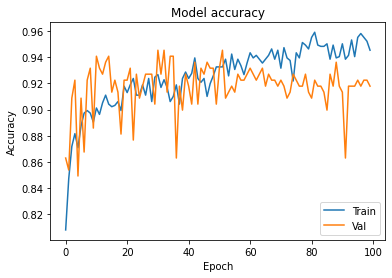

In [55]:
plt.plot(hist_2.history['accuracy'])
plt.plot(hist_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [56]:
## Now we will See that With more Dense Network Our validation Loss will increase. Lets Try Dense layer with 1000 neurons and 9 Hidden layers.

In [61]:
model_3 = Sequential([
    Dense(1000, activation='relu', input_shape=(10,)),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1000, activation='relu'),
    Dense(1, activation='sigmoid'),
])
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.6043 - accuracy: 0.6204 - val_loss: 0.4257 - val_accuracy: 0.8265
Epoch 2/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.4404 - accuracy: 0.8239 - val_loss: 0.3175 - val_accuracy: 0.9132
Epoch 3/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3592 - accuracy: 0.8620 - val_loss: 0.2744 - val_accuracy: 0.8813
Epoch 4/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3240 - accuracy: 0.8640 - val_loss: 0.1995 - val_accuracy: 0.9269
Epoch 5/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.3029 - accuracy: 0.8659 - val_loss: 0.2277 - val_accuracy: 0.9132
Epoch 6/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.2892 - accuracy: 0.8826 - val_loss: 0.2553 - val_accuracy: 0.8995
Epoch 7/100
1022/1022 [==============================] - 4s 4ms/step - loss: 0.2873

In [62]:
model_3.evaluate(X_test, Y_test)[1]

219/219 [==============================] - 0s 573us/step


0.8721461296081543

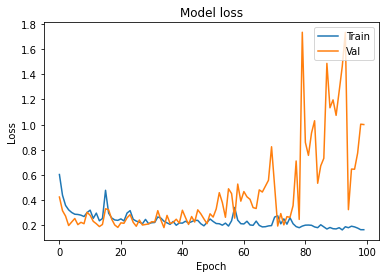

In [63]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

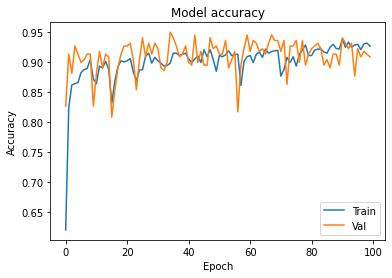

In [64]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [65]:
## To address the overfitting we see in Model 2, we'll incorporate L2 regularization and dropout in our third model here (Model 3).

In [66]:

from keras.layers import Dropout
from keras import regularizers

In [67]:
model_4 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [68]:
model_4.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_4 = model_4.fit(X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val))

Train on 1022 samples, validate on 219 samples
Epoch 1/100
1022/1022 [==============================] - 2s 2ms/step - loss: 14.2360 - accuracy: 0.6125 - val_loss: 3.8761 - val_accuracy: 0.7626
Epoch 2/100
1022/1022 [==============================] - 2s 2ms/step - loss: 1.6934 - accuracy: 0.8180 - val_loss: 0.6756 - val_accuracy: 0.8584
Epoch 3/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5716 - accuracy: 0.8659 - val_loss: 0.4789 - val_accuracy: 0.8904
Epoch 4/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5210 - accuracy: 0.8591 - val_loss: 0.4958 - val_accuracy: 0.8676
Epoch 5/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.5084 - accuracy: 0.8718 - val_loss: 0.4268 - val_accuracy: 0.9041
Epoch 6/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.4939 - accuracy: 0.8630 - val_loss: 0.4196 - val_accuracy: 0.8950
Epoch 7/100
1022/1022 [==============================] - 2s 2ms/step - loss: 0.476

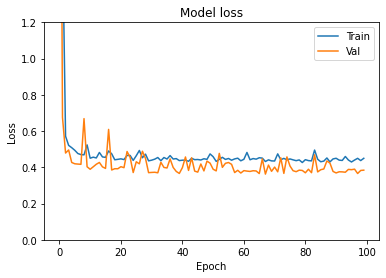

In [69]:
plt.plot(hist_4.history['loss'])
plt.plot(hist_4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0)
plt.show()

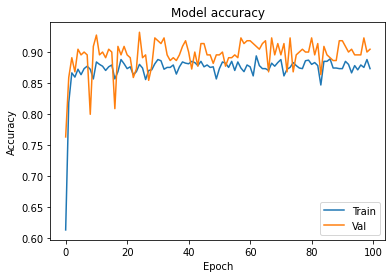

In [70]:
plt.plot(hist_4.history['accuracy'])
plt.plot(hist_4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [71]:
## We can see that after introducing Regularization we have less Overfitting in Model 4 as Compared to Model2 and Model3.